In [31]:
import numpy as np
import xarray as xr
import gsw
import os
import matplotlib.pyplot as plt
import mplniw.sigp as sp
import mplniw.utils as ut

In [8]:
root_dir = '/Users/zcasparcohen/codes/NIW/data/'

In [15]:
#os.listdir(root_dir)
ds = xr.open_dataset(root_dir+'t_10m_2min.nc').rename({'__xarray_dataarray_variable__':'temperature','depth':'z'})

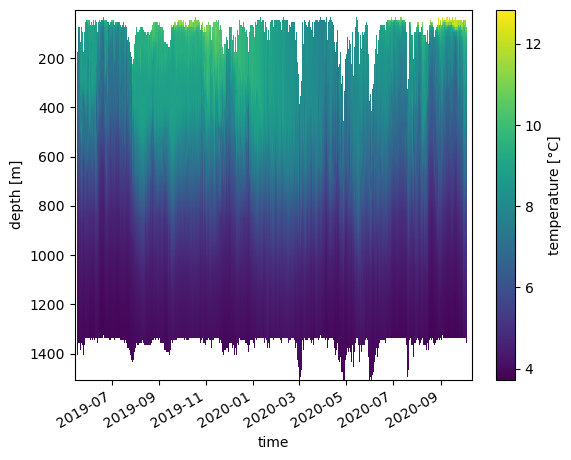

In [14]:
ds.temperature.plot(yincrease=False)

In [17]:
ds['Tz'] = ds.temperature.differentiate('z')

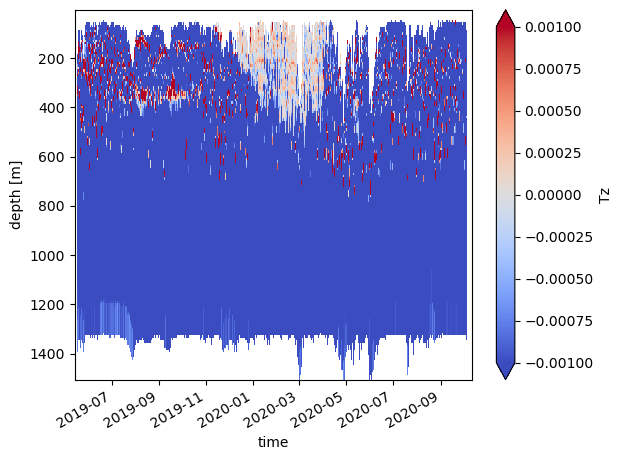

In [18]:
ds.Tz.plot(yincrease=False,cmap='coolwarm',vmax=0.001)

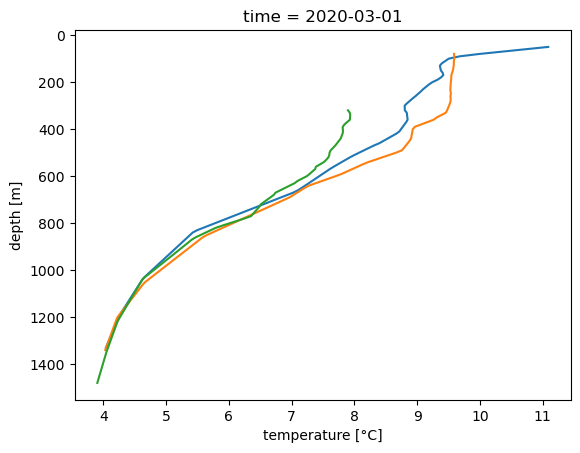

In [25]:
t0,t1,t2='2019-10-01T00:00:000','2020-01-01T00:00:000','2020-03-01T00:00:000'
ds.temperature.sel(time=t0).plot(y='z',yincrease=False)
ds.temperature.sel(time=t1).plot(y='z',yincrease=False)
ds.temperature.sel(time=t2).plot(y='z',yincrease=False)

In [26]:
import scipy

In [28]:
matfile = scipy.io.loadmat(root_dir+'InterpolatedM1_10mBins.mat')

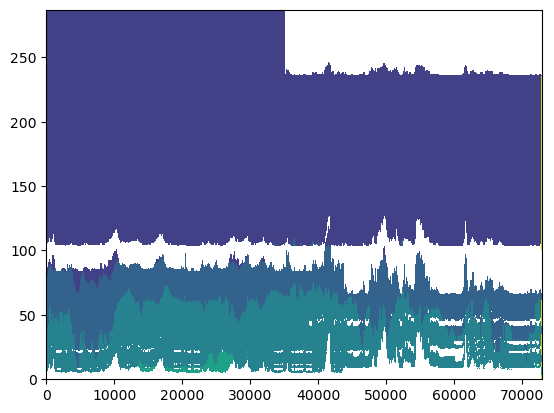

In [32]:
plt.contourf(matfile['temperature'])


In [45]:
# Time-depth coordinates
import gvpy as gv
time = gv.time.mtlb2datetime(matfile['time'][0, :])
znew = np.arange(0,2880,10)

In [50]:
ds_temp = xr.Dataset({'temperature':(['z','time'],matfile['temperature']),
            'salinity':(['z','time'],matfile['salinity']),
            'pressure':(['z','time'],matfile['pressure'])},
           coords={'time':(['time'],time),'z':(['z'],znew)})

/var/folders/vl/tj6snrv54zd212pkvk5g_l140000gn/T/ipykernel_1593/2195545346.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ds_temp = xr.Dataset({'temperature':(['z','time'],matfile['temperature']),


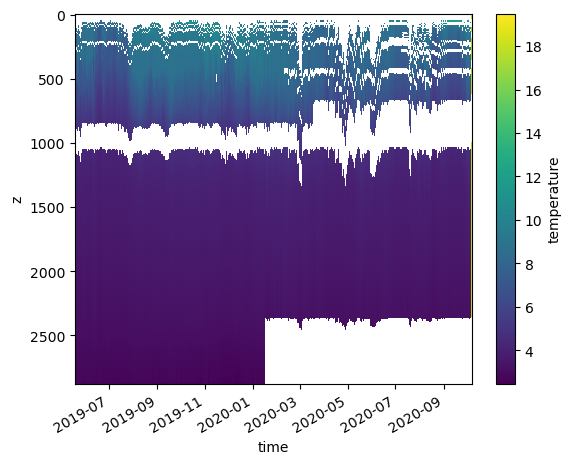

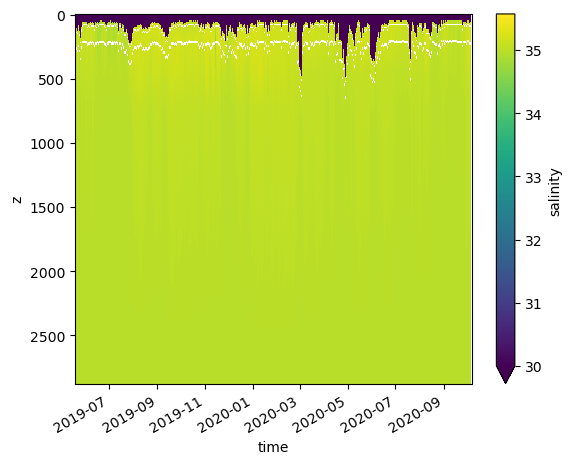

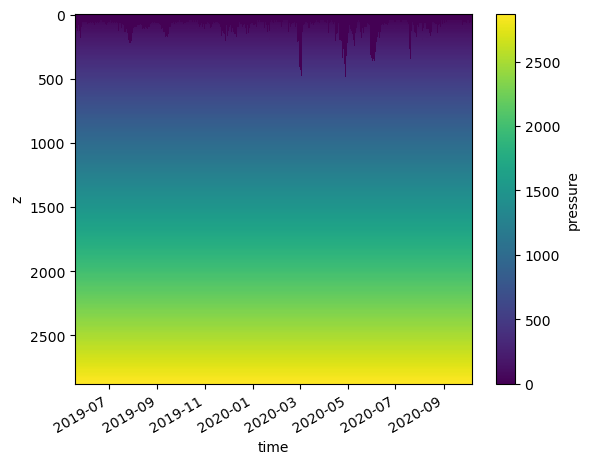

In [62]:
ds_temp.temperature.plot(y='z',yincrease=False)
plt.figure()
ds_temp.salinity.plot(y='z',yincrease=False,vmin=30)

plt.figure()
ds_temp.pressure.plot(y='z',yincrease=False)

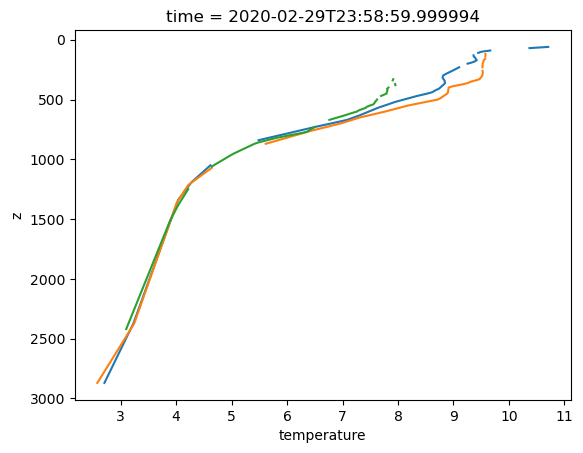

In [56]:
t0,t1,t2='2019-10-01T00:00:000','2020-01-01T00:00:000','2020-03-01T00:00:000'
ds_temp.temperature.sel(time=t0,method='nearest').plot(y='z',yincrease=False)
ds_temp.temperature.sel(time=t1,method='nearest').plot(y='z',yincrease=False)
ds_temp.temperature.sel(time=t2,method='nearest').plot(y='z',yincrease=False)

(33.0, 36.0)

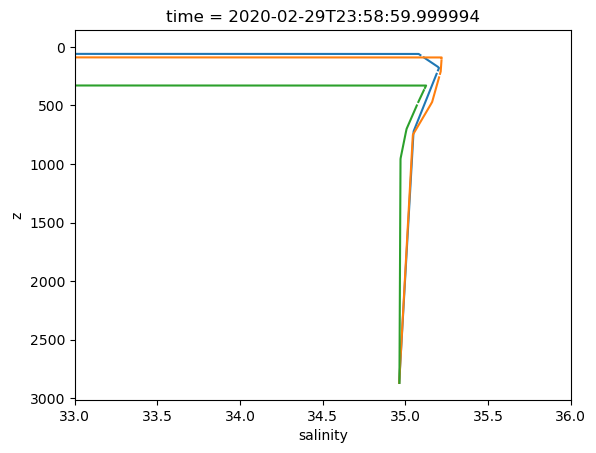

In [61]:
ds_temp.salinity.sel(time=t0,method='nearest').plot(y='z',yincrease=False)
ds_temp.salinity.sel(time=t1,method='nearest').plot(y='z',yincrease=False)
ds_temp.salinity.sel(time=t2,method='nearest').plot(y='z',yincrease=False)
plt.xlim(33,36)

In [55]:
ds_temp.temperature.sel(time=t0,method='nearest')


<xarray.DataArray 'temperature' (z: 288)>
array([        nan,         nan,         nan,         nan,         nan,
               nan, 10.71055404, 10.3719307 ,         nan,  9.66470259,
        9.50701064,  9.44683802,         nan,  9.36319708,  9.36685447,
        9.39330613,  9.4019856 ,  9.42209186,  9.39021951,  9.33525051,
        9.25546468,         nan,         nan,  9.10371184,  9.06385732,
        9.02094295,  8.97911066,  8.93247328,  8.88942   ,  8.84834238,
        8.81332913,  8.80818146,  8.80702706,  8.82157137,  8.83965057,
        8.84402954,  8.84840851,  8.83611804,  8.81160519,  8.78709235,
        8.76257951,  8.73806667,  8.6867025 ,  8.64878214,  8.61086179,
        8.53028361,  8.43837835,  8.34617585,  8.26695253,  8.1877292 ,
        8.10850588,  8.02928255,  7.95005923,  7.88651553,  7.82349048,
        7.76046542,  7.69744037,  7.63441532,  7.58248706,  7.5315054 ,
        7.48052374,  7.42954209,  7.37856043,  7.32055379,  7.26154193,
        7.20253008,  7.14351823,  7.08450638,  6.9915904 ,  6.89164342,
        6.79169645,  6.69174947,  6.5918025 ,  6.49805074,  6.40602948,
        6.31400822,  6.22198697,  6.12996571,  6.03794445,  5.94592319,
        5.85390194,  5.76188068,  5.66985942,  5.57783816,  5.48581691,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
...
        3.5966565 ,  3.58885997,  3.58106344,  3.57326691,  3.56547037,
        3.55767384,  3.54987731,  3.54208078,  3.53428425,  3.52648771,
        3.51869118,  3.51089465,  3.50309812,  3.49530159,  3.48750505,
        3.47970852,  3.47191199,  3.46411546,  3.45631893,  3.44852239,
        3.44072586,  3.43292933,  3.4251328 ,  3.41733627,  3.40953973,
        3.4017432 ,  3.39394667,  3.38615014,  3.37835361,  3.37055708,
        3.36276054,  3.35496401,  3.34716748,  3.33937095,  3.33157442,
        3.32377788,  3.31598135,  3.30818482,  3.30038829,  3.29259176,
        3.28479522,  3.27699869,  3.26920216,  3.26140563,  3.2536091 ,
        3.24581256,  3.23801603,  3.22959469,  3.21909076,  3.20858682,
        3.19808289,  3.18757895,  3.17707502,  3.16657108,  3.15606715,
        3.14556322,  3.13505928,  3.12455535,  3.11405141,  3.10354748,
        3.09304354,  3.08253961,  3.07203568,  3.06153174,  3.05102781,
        3.04052387,  3.03001994,  3.019516  ,  3.00901207,  2.99850814,
        2.9880042 ,  2.97750027,  2.96699633,  2.9564924 ,  2.94598846,
        2.93548453,  2.9249806 ,  2.91447666,  2.90397273,  2.89346879,
        2.88296486,  2.87246092,  2.86195699,  2.85145306,  2.84094912,
        2.83044519,  2.81994125,  2.80943732,  2.79893338,  2.78842945,
        2.77792552,  2.76742158,  2.75691765,  2.74641371,  2.73590978,
        2.72540584,  2.71490191,  2.70439797])
Coordinates:
    time     datetime64[ns] 2019-09-30T23:59:00.000004
  * z        (z) int64 0 10 20 30 40 50 60 ... 2820 2830 2840 2850 2860 2870


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x13964e840> (for post_execute):


KeyboardInterrupt: 

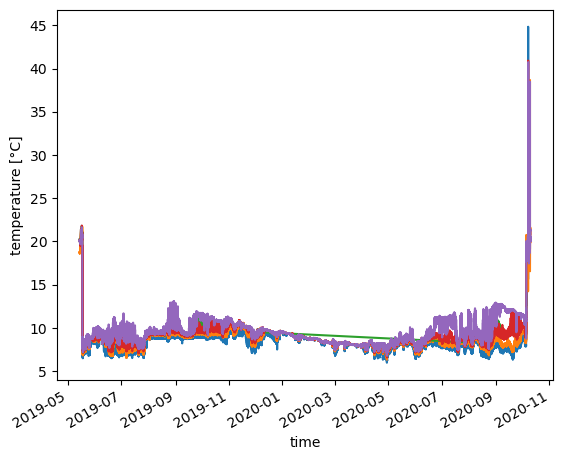

In [74]:
for file in os.listdir(root_dir+'temperature/'):
    _ = xr.open_dataset(root_dir+'temperature/'+file)
    _.t.plot()

In [75]:
os.listdir(root_dir+'temperature/')

['SBE05606428_2020-10-08.nc',
 '072206_20201010_0446.nc',
 'SBE05606435_2020-10-07.nc',
 'SBE05600413_2020-10-07.nc',
 '076608_20201010_0825.nc',
 '072214_20201010_0320.nc',
 'SBE05606421_2020-10-08.nc',
 '072210_20201010_1648.nc',
 'SBE05606432_2020-10-08.nc',
 'SBE05606445_2020-10-08.nc',
 'SBE05606426_2020-10-08.nc',
 'SBE05606429_2020-10-07.nc',
 'SBE05600395_2020-10-08.nc',
 '072202_20201010_0709.nc',
 'SBE05606420_2020-10-08.nc',
 'SBE05606447_2020-10-08.nc',
 'SBE05606437_2020-10-07.nc',
 '076611_20201009_1500.nc',
 'SBE05600422_2020-10-08.nc',
 'SBE05606413_2020-10-08.nc',
 'SBE05606439_2020-10-08.nc',
 '072215_20201010_1030.nc',
 '072219_20201010_0545.nc',
 'SBE05606417_2020-10-08.nc',
 '072216_20201010_0646.nc',
 '072208_20201010_1753.nc',
 'SBE05600425_2020-10-08.nc',
 'SBE05606414_2020-10-08.nc',
 'SBE05600455_2020-10-08.nc',
 'SBE05605462_2020-10-08.nc']

In [76]:
_ = xr.open_dataset(root_dir+'temperature/'+'072206_20201010_0446.nc')

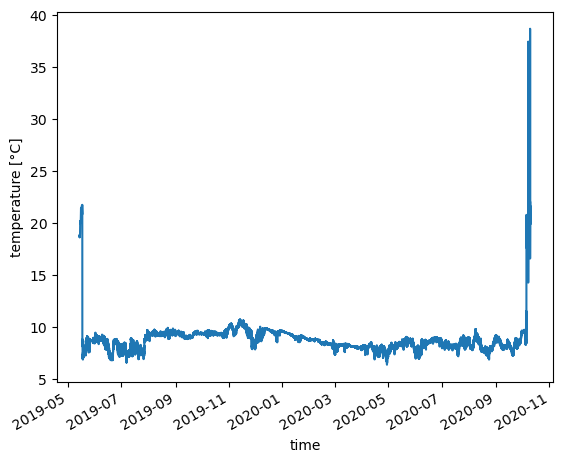

In [79]:
_.t.plot()